In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from sklearn import preprocessing 

from scipy.stats import skew, boxcox_normmax 
from scipy.special import boxcox1p 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score, roc_curve 
from sklearn import model_selection 
from sklearn.feature_selection import RFE, RFECV 

df = pd.read_csv('https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.csv')
df.head()

In [3]:
print('Rows:', df.shape[0], '| Columns:', df.shape[1])

Rows: 14999 | Columns: 10


In [4]:
def df_desc(df):
    import pandas as pd
    desc = pd.DataFrame({'dtype': df.dtypes,
                         'NAs': df.isna().sum(),
                         'Numerical': (df.dtypes != 'object') & (df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() != len(df)),
                         'Boolean': df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() == len(df),
                         'Categorical': df.dtypes == 'object',
                        })
    return desc

df_desc(df)

,dtype,NAs,Numerical,Boolean,Categorical
satisfaction_level,float64,0,True,False,False
last_evaluation,float64,0,True,False,False
number_project,int64,0,True,False,False
average_montly_hours,int64,0,True,False,False
time_spend_company,int64,0,True,False,False
Work_accident,int64,0,False,True,False
left,int64,0,False,True,False
promotion_last_5years,int64,0,False,True,False
sales,object,0,False,False,True
salary,object,0,False,False,True


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
categories = {'sales': df['sales'].unique().tolist(),
 'salary':hr['salary'].unique().tolist()}
for i in sorted(categories.keys()):
    print(i+":")
    print(categories[i])
    if i != sorted(categories.keys())[-1] :print("\n")

salary:
['low', 'medium', 'high']


sales:
['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']


In [7]:
df = df.rename(index=str, columns={'sales':'department'})

In [8]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [9]:
hr.groupby('left').mean()

/var/folders/v2/lw6f6b7d16q2_yf4k_8hbpch0000gn/T/ipykernel_416/2087316466.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


/var/folders/v2/lw6f6b7d16q2_yf4k_8hbpch0000gn/T/ipykernel_416/2859091720.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr.corr(), cmap='RdBu', annot=True)


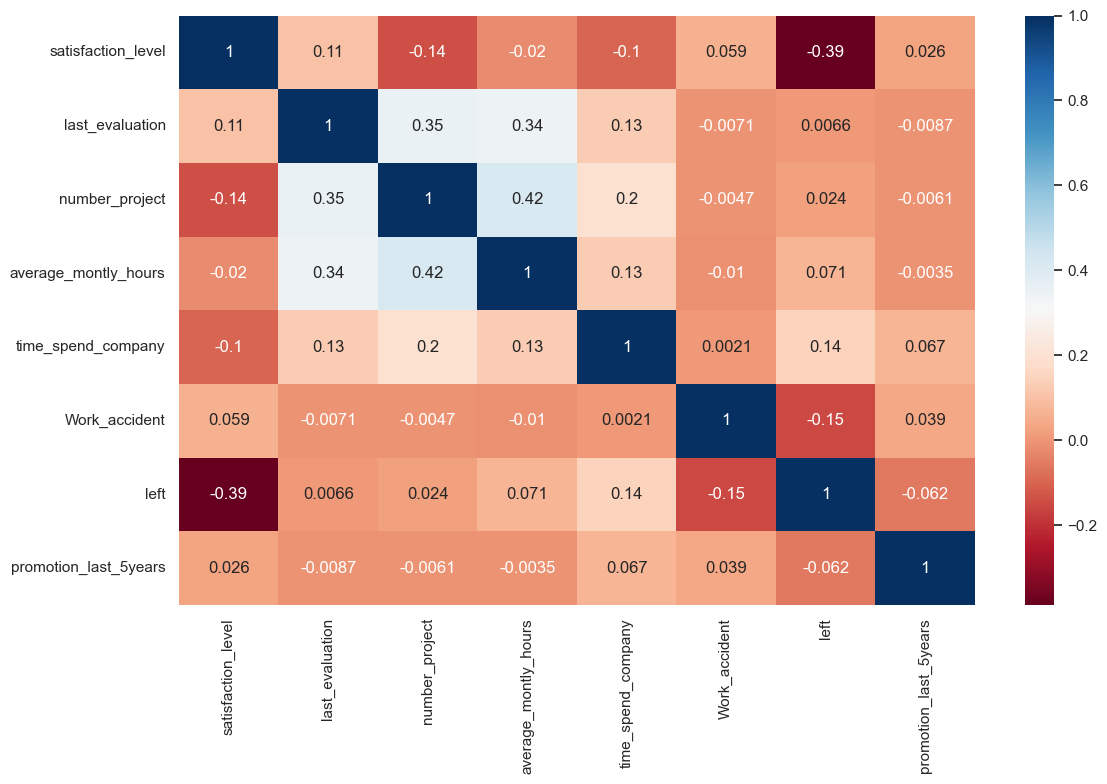

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(hr.corr(), cmap='RdBu', annot=True)
plt.tight_layout()

In [11]:
print('Salary Levels proportions')
print(df['salary'].value_counts()/len(hr)*100)
print('\n')
print('Turnover Rate by Salary level')
print(hr.groupby('salary')['left'].mean())

Salary Levels proportions
low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64


Turnover Rate by Salary level
salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64


In [12]:
df['department'].value_counts()/len(hr)*100

sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: department, dtype: float64

/var/folders/v2/lw6f6b7d16q2_yf4k_8hbpch0000gn/T/ipykernel_416/1541143614.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hr.satisfaction_level,


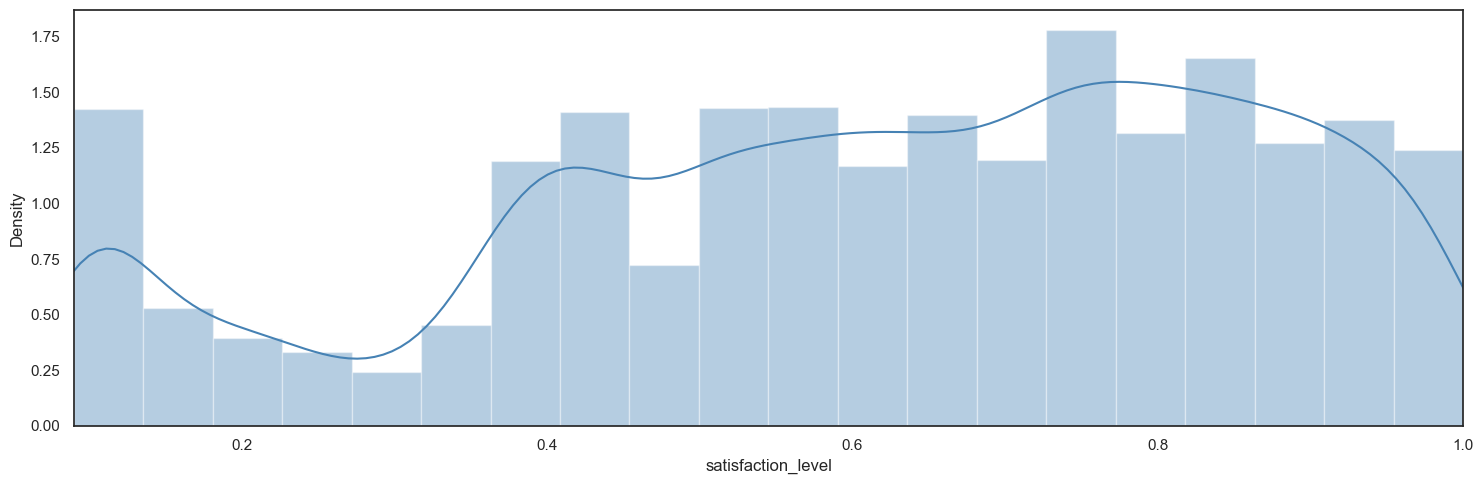

In [14]:
plt.figure(figsize=(15,5))
sns.distplot(hr.satisfaction_level,
             bins = 20,
             color = 'steelblue').axes.set_xlim(min(hr.satisfaction_level),max(hr.satisfaction_level))
plt.tight_layout()

In [15]:
salary_dict = {'low':0,'medium':1,'high':2}
df['salary_num'] = hr.salary.map(salary_dict)
df.drop('salary', inplace=True, axis=1)
df = hr.rename(index=str, columns={'salary_num':'salary'})
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0
